* Today's main subject is Regular Expressions (RegEx), which are text matching patterns described with a formal syntax. 
* Regular expressions can include a variety of rules, for finding repetition, text-matching, data-crawling, and file-naming and  more. 
* As you advance in Python you'll see that a lot of your parsing problems can be solved with regular expressions (they're also a common interview question!).


# Agenda
- Python, Strings, and Backslash

- Regular Expressions

- Exercises

## Python, Strings, and Backslash

### Using Double Quotes - Single Quotes
* Literals are the raw data that are assigned to variables or constants while programming. 
* In python, we have different types of literals such as   
   * String literals: Sequences of characters surrounded by single, double or triple quotes
   * Numeric literals: integers, floating point numbers and complex numbers 
   * Boolean literals: True and False
   * A special literal: None

In [1]:
## Here let's discuss the differences and use cases of single, double and triple quotes

string1 = 'Hello World!'
string2 = "Hello World!"
string3 = """Hello World!"""

In [2]:
print(string1, string2, string3)

Hello World! Hello World! Hello World!


In [3]:
## this would not work! uncomment the line below and run
# 'This is Data 601's notebook'

In [4]:
## this would work!
"This is Data 601's notebook"

"This is Data 601's notebook"

In [5]:
string4 = """
Hello Class!

This is Data 601!
 
            Lecture \n 12!

"""

In [6]:
print(string4)


Hello Class!

This is Data 601!
 
            Lecture 
 12!




### Backslash and Raw Strings

In [7]:
## use quote in a single quote with backslash symbol

string1 = 'UMBC\'s Biggest Program'
print(string1)


UMBC's Biggest Program


Raw string literals are string literals that are designed to make it easier to include nested characters like quotation marks and backslashes that normally have meanings as delimiters and escape sequence starts. 

* Python raw string is created by prefixing a string literal with ‘r’ or ‘R’. 
* Python raw string treats backslash (\\) as a literal character. 
* This is useful when we want to have a string that contains backslash and don’t want it to be treated as an escape character.

In [8]:
## using raw strings
string1 = 'Baltimore \n County'
print(string1)

Baltimore 
 County


In [9]:
string2 = r'Baltimore \n County'
print(string2)

Baltimore \n County


In [10]:
string5 = 'True \\ False'
print(string5)

True \ False


In [11]:
string6 = r'True \\ False'
print(string6)

True \\ False


In [12]:
## combining strings

string1 = 'Baltimore'

string2 = 'County'

## here combine string1 and string2
string1 +" " +  string2




'Baltimore County'

In [13]:
## Note also that we can use join method too.
"_".join(['University', 'of', 'Maryland'])

'University_of_Maryland'

In [14]:
## Note also that we can use join method too.
" ".join(['University', 'of', 'Maryland'])

'University of Maryland'

This method is quite useful for auto reports, chat-bots, etc

[more on join method](https://www.w3schools.com/python/ref_string_join.asp)

__Resources__

[Follow Chapter 6 from Automate-the-boring-stuff-with-python](https://automatetheboringstuff.com/)

[W3-School String Methods](https://www.w3schools.com/python/python_ref_string.asp)

## re - Regular Expressions
* Regular expressions (re or regex or regexp) are a text-matching tool embedded in Python
* They are useful in creating string searches and string modifications
* You can always use regular Python instead, but regexps are often much easier

In [15]:
import re

### Basics of RE construction
* Letters and numbers match themselves
* Normally case sensitive
* Watch out for punctuation–most of it has special meanings!

### Matching one of several alternatives
Square brackets mean that any of the listed characters will do <br>
* <code>[ab]</code> means either ”a” or ”b” <br>

You can also give a range:
* <code>[a-d]</code> means ”a” ”b” ”c” or ”d” <br>


Negation: caret means ”not” <br>
* <code>[^a-d]</code> # anything but a, b, c or d

### Wild cards
* ”.” means ”any character”. For example <br>
To match file names like ”hw3.pdf” and ”hw5.txt”: <br>
<code> hw.\.... </code> <br>


* If you really mean ”.” you must use a backslash
* Once again:
  * backslash is special in Python strings
  * It’s special again in REs
  * This means sometimes you might think that you have to use too many backslashes. We will use ”raw strings” instead <br>
  

* The dolar sign (<code>\$</code>) Matches the end of the string or just before the newline at the end of the string, which is useful for example to work with certain filetypes. 

### Zero or more copies
The asterisk (<code>*</code>) repeats the previous character 0 or more times
* ”<code>ca*t</code>” matches ”ct”, ”cat”, ”caat”, ”caaat” etc. <br>

The plus sign (<code>+</code>) repeats the previous character 1 or more times
* ”<code>ca+t</code>” matches ”cat”, ”caat” etc. but not ”ct”

### Repeats
* Braces are a more detailed way to indicate repeats
* <code>A{1,3}</code> means at least one and no more than three A’s
* <code>A{4,4}</code> means exactly four A’s

### Functions offered by a Pattern object:
* <code>match()</code>–does it match the beginning of my string? Returns None or a match object
* <code>search()</code>–does it match anywhere in my string? Returns None or a match object
* <code>findall()</code>–does it match anywhere in my string? Returns a list of strings (or an empty list)
  * Note that <code>findall()</code> does NOT return a Match object!

### Functions offered by a Match object:
* <code>group()</code>–return the string that matched
  * <code>group()</code>–the whole string
  * <code>group(1)</code>–the substring matching 1st parenthesized sub-pattern
  * <code>group(1,3)</code>–tuple of substrings matching 1st and 3rd parenthesized
* sub-patterns
  * <code>start()</code>–return the starting position of the match
  * <code>end()</code>–return the ending position of the match
  * <code>span()</code>–return (start,end) as a tuple

In [16]:
# EXAMPLE: Does this string contain a legal Python filename? 

mystring = "This contains two files, hw3.py and uppercase.py."

myrule = re.compile(r".+\.py")

mymatch = myrule.search(mystring)

mymatch.group()

'This contains two files, hw3.py and uppercase.py'

Not what we expected! Why? <br>
* Our RE matches ”hw3.py”
* Unfortunately it also matches ”This contains two files, hw3.py”
* And it even matches ”This contains two files, hw3.py and uppercase.py”
* Python will choose the longest match
* We could break my file into words first
* Or we could specify that no spaces are allowed in my match

In [17]:
mystring = "This contains two files, hw3.py and uppercase.py."

myrule = re.compile(r"[^ ]+\.py")

mymatch = myrule.search(mystring)

mymatch.group()

'hw3.py'

In [18]:
allmymatches = myrule.findall(mystring)

allmymatches

['hw3.py', 'uppercase.py']

## Creating Reg Objects
Let's say we would like to find phone number(s) in a document or a website

In [19]:
## compile a pattern to match a typical phone number, e.g. 410-455-1000
pattern = re.compile('\d\d\d-\d\d\d-\d\d\d\d')

In [20]:
ASentence = 'This is my phone number: 410-455-1000: call me!'

## let's find the match

mo = pattern.search(ASentence)

mo.group()

In [21]:
mo.group()

'410-455-1000'

Let's find the index of the first and last characters

In [22]:
mo.start()

25

In [23]:
mo.end()

37

In [24]:
ASentence[mo.start() : mo.end()]

'410-455-1000'

## Grouping - Use of `()`

In [25]:
## compile a pattern for 410-455-1000 
## so that we can separate the area code later on
pattern = re.compile(r'(\d\d\d)-\d\d\d-\d\d\d\d')

In [26]:
## search for a match
BSentence = "This is my phone number: 410-455-1000: call me!"
mo = pattern.search(BSentence)
mo.group()

'410-455-1000'

In [27]:
## check group 0
mo.group(0)

'410-455-1000'

In [28]:
## check group 1
mo.group(1)

'410'

In [29]:
## note that \(  is matching with exactly (
pattern = re.compile(r'\(\d\d\d\)-\(\d\d\d-\d\d\d\d\)')
mo = pattern.search('(410)-(455-1000)')
mo.group()

'(410)-(455-1000)'

In [30]:
mo.group(0)

'(410)-(455-1000)'

In [31]:
# this will give an error because we did exact matching
# uncomment and run the following line
# mo.group(1)

### Matching Alternatives - Pipes with  <code> | </code > 
* <code>A|B</code>, where A and B can be arbitrary REs, creates a regular expression that will match either A or B. 
* An arbitrary number of REs can be separated by the '|' in this way. 
* This can be used inside groups (see below) as well. 
* As the target string is scanned, REs separated by '|' are tried from left to right. When one pattern completely matches, that branch is accepted. <b> This means that once A matches, B will not be tested further, even if it would produce a longer overall match. </b>

In [32]:
## compile a regex for matching MD or Maryland
pattern = re.compile(r'MD|Maryland')
## search for the match
case1 = pattern.search("UMBC is in Maryland (MD)")
case1.group()

'Maryland'

In [33]:
case2 = pattern.search("UMBC is in MD, which is short for Maryland.")
case2.group()

'MD'

In [34]:
## create a pattern that matches with 3 digit number or 4 digit number

pattern = re.compile(r'\d\d\d|\d\d\d\d')

mo = pattern.search('1521-312-212414')

mo.group()

'152'

__Matching Alternatives with Groups__

In [35]:
## compile a regex for matching jupyter(notebooks|notebook|lab)
pattern = re.compile(r'jupyter (notebooks|notebook|lab)')
## check for a match
case1 = pattern.search('We use jupyter notebooks')
case1.group()

'jupyter notebooks'

In [36]:
case1 = pattern.search('We will have a jupyter lab. Where is my jupyter notebook?')
case1.group()

'jupyter lab'

Note that if we want to match the `|` character, then we can escape it with `\`

## Matching zero or one - Use of `?` symbol

In [37]:
## Find the phono number which might be entered as XYZ-ASD-ZXCF or XYZASDZXCF or XYZ ASD ZXCF
## What we need is a follows
## We first look for three characters
## Then there might be a dash or space but maybe
## so we need to insert (-| )? in between, e.g.
pattern = re.compile(r'\d\d\d(-| )?\d\d\d(-| )?\d\d\d\d')
case1 = pattern.search('First, we write in this format 4104551000')
case1.group()

'4104551000'

In [38]:
case2 = pattern.search('Then, we write in this format 410-455-1000')
case2.group()

'410-455-1000'

In [39]:
case3 = pattern.search('Then, we write in this format 410 455 1000')
case3.group()

'410 455 1000'

In [40]:
# Note this
string = '41045510000'

In [41]:
## search for a match
mo = pattern.search(string)
## check the groups
mo.group()

'4104551000'

Now let's compile a pattern that can match phone numbers with and without area codes, e.g. (410)-455-1000 or 455-1000. <br>
Remember <code> ? </code> means either 0 or 1 repeatition. So if we write <code> X?Y </code>, then it will search for <code> XY</code> and <code> Y </code>. Let's benefit from this.

In [42]:
pattern = re.compile(r'(\(\d\d\d\)-)?(\d\d\d-\d\d\d\d)')

In [43]:
string1= '(410)-455-1000'
string2 = '455-1000'
string3 = '-455-1000'
string4= '410-455-1000'

mo = pattern.search(string1)
mo.group()

'(410)-455-1000'

In [44]:
mo = pattern.search(string2)
mo.group()

'455-1000'

In [45]:
mo = pattern.search(string3)
mo.group()

'455-1000'

In [46]:
mo = pattern.search(string4)
mo.group()

'455-1000'

In [47]:
## Note that ? catches at most one char
pattern = re.compile(r'\d-?\d')

mo = pattern.search('1-2')
mo.group()

'1-2'

In [48]:
mo = pattern.search('1--2')
# this will fail, uncomment and run
# mo.group()

## Matching zero or more - Use of `*` symbol
Remember, <br>
The asterisk (<code>*</code>) repeats the previous character 0 or more times
* ”<code>ca*t</code>” matches ”ct”, ”cat”, ”caat”, ”caaat” etc. <br>

The plus sign (<code>+</code>) repeats the previous character 1 or more times
* ”<code>ca+t</code>” matches ”cat”, ”caat” etc. but not ”ct”

In [49]:
## compile a pattern for mathing 410-455-1000

In [50]:
string = '410-455-1000'

In [51]:
## match pattern
pattern = re.compile(r'\d*-\d*-\d*')

In [52]:
string = '410-455-1000'

mo = pattern.search(string)
mo.group()

'410-455-1000'

<b>What migth go wrong here? </b>

In [53]:
string2 = '41--10000'
pattern = re.compile(r'(\d*)-(\d*)-(\d*)')
mo = pattern.search(string2)
mo.group()

'41--10000'

Read the definition again: <b> 0 or more times </b>. <br>
Solution ==>

## Match One or More

In [54]:
## compile a pattern for mathing 410-455-1000
pattern = re.compile(r'\d+-\d+-\d+')

In [55]:
string = '410-455-1000'

In [56]:
## match the pattern

mo = pattern.search(string)
mo.group()

'410-455-1000'

In [57]:
string2 = '41--10000'
mo2 = pattern.search(string2) 
# this will fail because it won't find the pattern, uncomment and run
# mo2.group()

In [58]:
##  by the way, pattern.search(string2) can be also written as re.search(pattern, string2), e.g.
# string2 = '41--10000'
# re.search(pattern, string2)

What might go wrong?

In [59]:
## another case? Try to find a case where this might not be an ideal pattern for phone number matching
string3 = '100000000-1020202020202-102020202020202'

re.search(pattern, string3)

<re.Match object; span=(0, 39), match='100000000-1020202020202-102020202020202'>

Read the definition again: <b>one or more times. But we don't know how many more!! </b>. <br>
Solution ==>

## Matching a Fixed Amount of Repetition - use of `{}`

In [60]:
## compile a pattern for mathing 410-455-1000

pattern = re.compile(r'\d{3}-\d{3}-\d{4}')

In [61]:
string2 = '410-455-1000'

pattern = re.compile(r'(\d*)-(\d*)-(\d*)')
mo = pattern.search(string2)
mo.group()



'410-455-1000'

In [62]:
string = '410-455-1000'
pattern = re.compile(r'\d{3}-\d{3}-\d{4}')
re.search(pattern, string)


<re.Match object; span=(0, 12), match='410-455-1000'>

In [63]:
string2 = '1201212-121212-121'
re.search(pattern, string2)

__Use of `{i, j}}`__


In [64]:
## Suppose each address in united states start with a number with 2 to 7 numbers
## i.e. 10117 west street, Baltimore, MD or 13 Elm Street, Baltimore, MD

## compile a pattern that catches the street number
pattern = re.compile(r'\d{2,7}')

In [65]:
umbc = "1000 Hilltop Circle Baltimore, MD 21250"
re.search(pattern, umbc)

<re.Match object; span=(0, 4), match='1000'>

In [66]:
loc = '101 Independence Ave SE'

In [67]:
re.search(pattern, loc)

<re.Match object; span=(0, 3), match='101'>

## Character Classes

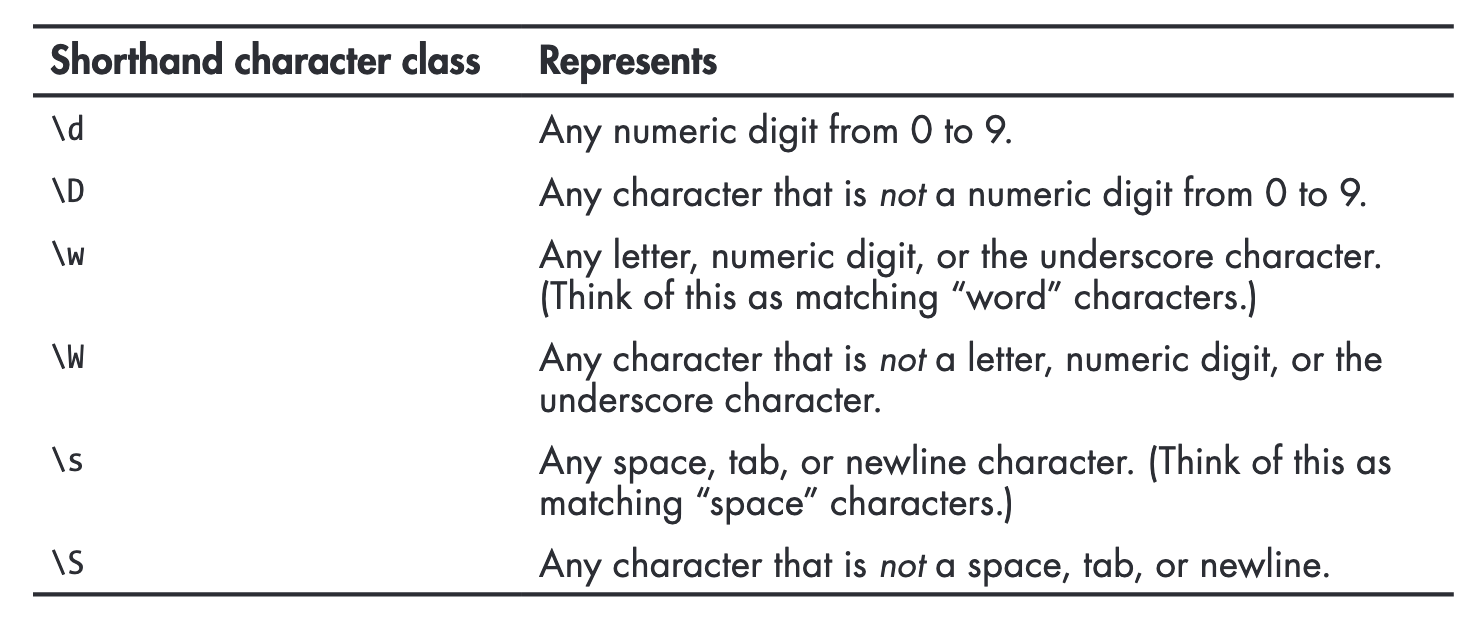

## Caret `^` and `$` symbols

- use the caret symbol (^) at the start of a regex to indicate that
a match must occur at the beginning of the searched text. 
- Use a dollar sign ($) at the end of the regex to indicate the string must end
with this regex pattern.

In [68]:
## let's take a look at 'hello world!
beginsWithHello = re.compile(r'^Hello')
beginsWithHello.search('Hello world!')

<re.Match object; span=(0, 5), match='Hello'>

In [69]:
## note that there is no match in the following case
beginsWithHello.search('He said Hello.') == None

True

In [70]:
## similarly let's use $ symbol
endsWithNumber = re.compile(r'\d$')

endsWithNumber.search('Your lucky number is 13') == None

False


### Case-Insensitive

In [71]:
## note that we can also use flags to case-insensitive matches
robocop = re.compile(r'robocop', re.I)
robocop.search('RoboCop is part man, part machine, all cop.').group()

'RoboCop'

### Split

In [72]:
split_term = '/'

phrase = '11/29/2021'

# Split the phrase
re.split(split_term,phrase)

['11', '29', '2021']

[Re module - Documentation](https://docs.python.org/3/library/re.html)

RegEx has many options: https://docs.python.org/3/library/re.html